len: 2448
['0.00', '0.50', '1.00', '1.50', '2.00', '2.50', '3.00', '3.50', '4.00', '4.50']
['-15.00', '-15.00', '-15.00', '-15.00', '-15.00', '-15.00', '-15.00', '-15.00', '-15.00', '-15.00']
[41.919, 41.239, 41.479, 41.716, 41.921, 41.649, 41.208, 40.865, 40.39, 40.841]


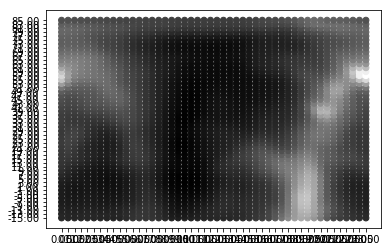

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

ra  = list()   # 0
dec = list()  # 1
freq = {"25":2,"20":3,"16.7":4,"14.7":5,"12":6}
t = list()

with open("tmp_files/exmpl.txt") as f:
    for line in f:
        s = line.split()
        
        ra.append(s[0])
        dec.append(s[1])
        t.append(float(s[freq["25"]]))         
    
print("len: {0}".format(len(data)))
print(ra[0:10])
print(dec[0:10])
print(t[0:10])

fig = plt.figure()
plt.scatter(ra, dec,c=t,cmap='gray')
fig.savefig('tmp_files/exmpl.png')
plt.show()